<a href="https://colab.research.google.com/github/Millyisblessed/BHS2018/blob/master/HBIPS_Final_Capstone_9_12_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Final Capstone Project**

## Team 2 

         September 12, 2020
         
 

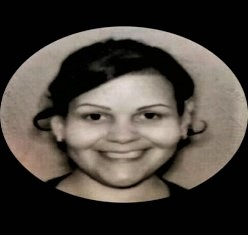Milagros Melendez

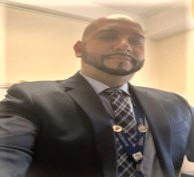Emanuel Lopez

#Hospital Compare datasets
These are the official datasets used on the Medicare.gov Hospital Compare Website provided by the Centers for Medicare & Medicaid Services. These data allow you to compare the quality of care at over 4,000 Medicare-certified hospitals across the country.

#Motivation
Our Team wanted to explore a healthcare topic that was new to us and linked to NYC Health + Hospital.  We took the opportunity to understand the Inpatient Psychiatric Facility Quality Measure Data – by Facility.  Psychiatric facilities that are eligible for the Inpatient Psychiatric Facility Quality Reporting (IPFQR) program are required to meet all program requirements, otherwise their Medicare payments may be reduced.

#Data Overview

The IPFQR program is a pay-for-reporting program intended to equip consumers with quality of care information to make more informed decisions about healthcare options. It is also intended to encourage hospitals and clinicians to improve the quality of inpatient care provided to beneficiaries by, first, ensuring that providers are aware of and reporting on best practices for their respective facilities and type of care. Because this is a pay-for-reporting program, facilities will be subject to payment reduction for non-participation. Eligible Psychiatric hospitals that do not participate in the IPFQR program in a fiscal year will receive a 2.0 percentage point reduction to their annual update to their standard federal rate for that year. The reduction is noncumulative across payment years.

The IPFQR program requires facilities to submit data for specific inpatient psychiatric clinical process measures.  To meet the IPFQR program requirement, Inpatient Psychiatric Facilities (IPFs) will be required to submit all quality measures in the form, manner, and time as specified by the Secretary, to the Centers for Medicare & Medicaid Services (CMS), beginning with Fiscal Year (FY) determination year and subsequent fiscal years. Participating IPFs must comply with the program requirements, which will be set forth through rule-making, including public reporting of the measure rates.

#Data Sources
Source Domain: data.medicare.gov

The Data can be exported by Downloading Inpatient Psychiatric Facility Quality Measure Data – by Facility for offline use in other applications.

*   CSV / CSV for Excel
Additional Formats
*   CSV for Excel (Europe)
*   RDF
*   RSS
*   TSV for Excel
*   XML

The API vend data from https://dev.socrata.com 
*   sodapy is a python client for the Socrata Open Data API.








#Hospital-Based Inpatient Psychiatric Services(HBIPS) Core Measures

Focused on:

*   HBIPS-2 and HBIPS-3 – Total Hours of Seclusion/Restraint 

*   HBIPS-5 - Use of 2 or more antipsychotics medication with appropriate justification for such use at discharge

*   FUH-7 Day and FUH-30 - Follow-Up Within 7 Days & 30 Days Post-Discharge

*   READM-30-IPF - 30-Day All-Cause Unplanned Readmission 



# **Research Question**

              List of research questions
              1.  Which one of our facilities indicated better performance rate for HBIPS-2 of our facilities?
              2.  What facilities indicated the better performance rate for HBIPS-3?
              3.  What facility scored the best performance HBIPS-5?
              4.  What facility had the best % of patients follow-up post discharge for continuum of care within 30 days from discharge respectively?
              5.  What facility had the best % of patients follow-up post discharge for continuum of care within 7 days from discharge respectively?
              6.  Which of our facilities had the lowest rate of unplanned readmission within 30 days of discharge from IPF?


#           **Data Acquisition**

      Data Collection / Gathering / Aqauisition techciques
 
             *  Data Collection
             *  Load Dataset
             *  Information on data
             *  Collection techniques and detail
             
            

In [ ]:
import pandas as pd

In [ ]:
!pip install sodapy

In [ ]:
#upload data and determines what type of data it is.
from sodapy import Socrata

In [ ]:
!pip install chart_studio

In [ ]:
import chart_studio.plotly as py

In [ ]:
!pip install dexplot

In [ ]:
#Import libraries needed packages to process data 
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing  
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as bar
import matplotlib.pyplot as bar
from matplotlib import style
from plotly.offline import init_notebook_mode, iplot
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import tools
import seaborn as sns
sns.set()
import altair as alt
from vega_datasets import data
import datetime
import warnings
import json
import dexplot as dxp
warnings.filterwarnings("ignore")

In [ ]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.medicare.gov", None)

In [ ]:
# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
#results = client.get("q9vs-r7wp", limit=2000)
results = client.get("q9vs-r7wp", limit=816000)

In [ ]:
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [ ]:
results_df.shape

(1602, 91)

In [ ]:
results_df.head()

,provider_number,hospital_name,address,city,state,zip_code,county_name,hbips_2_measure_description,hbips_2_overall_rate_per_1000,hbips_2_overall_num,hbips_2_overall_den,hbips_3_measure_description,hbips_3_overall_rate_per_1000,hbips_3_overall_num,hbips_3_overall_den,hbips_5_measure_description,hbips_5_percent,hbips_5_denominator,smd_measure_description,smb_,smd_denominator,sub_2_2a_measure_description,sub_2_,sub_2_denominator,sub_2a_,sub_2a_denominator,sub_3_3a_measure_description,sub_3_,sub_3_denominator,sub_3a_,sub_3a_denominator,tob_2_2a_measure_desc,tob_2_,tob_2_2a_denominator,tob_2a_,tob_2a_denominator,tob_3_3a_measure_description,tob_3_,tob_3_denominator,tob_3a_,...,fuh_30_denominator,fuh_7_,fuh_7_denominator,fuh_measure_start_date,fuh_measure_end_date,readm_30_ipf_measure_desc,readm_30_ipf_category,readm_30_ipf_denominator,readm_30_ipf_rate,readm_30_ipf_lower_estimate,readm_30_ipf_higher_estimate,readm_30_ipf_start_date,readm_30_ipf_end_date,imm_2_measure_description,imm_2_,imm_2_denominator,flu_season_start_date,flu_season_end_date,location,:@computed_region_f3tr_pr43,:@computed_region_nwen_78xc,:@computed_region_csmy_5jwy,hbips_5_footnote,readm_30_ipf_footnote,sub_2_footnote,sub_2a_footnote,sub_3_footnote,sub_3a_footnote,tob_2_footnote,tob_2a_footnote,tob_3_footnote,tob_3a_footnote,fuh_30_footnote,fuh_7_footnote,smb_footnote,imm_2_footnote,hbips_3_overall_footnote,hbips_2_overall_footnote,tr_1_footnote,tr_2_footnote
0,050077,SCRIPPS MERCY HOSPITAL,4077 5TH AVE,SAN DIEGO,CA,92103,SAN DIEGO,Hours of physical-restraint use,0.02,8,16693,Hours of seclusion use,0.00,0,16693,Patients discharged on multiple antipsychotic ...,93.00,41,Screening for metabolic disorders (SMD),99,308,Alcohol use brief intervention provided or off...,94,142,92,142,Alcohol and other drug use disorder treatment ...,81,367,73,367,Tobacco use treatment provided or offered,94,189,57,189,Tobacco use treatment provided or offered at d...,66,176,56,...,92,38,92,07/01/2017,06/30/2018,Patients readmitted to any hospital within 30 ...,No Different Than the National Rate,319,19.5,16.4,23.0,07/01/2016,06/30/2018,Influenza immunization (IPFQR-IMM-2),84,327,10/01/2018,03/31/2019,"{'latitude': '32.751211', 'longitude': '-117.1...",1179,1179,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,050272,REDLANDS COMMUNITY HOSPITAL,350 TERRACINA BLVD,REDLANDS,CA,92373,SAN BERNARDINO,Hours of physical-restraint use,0.24,20.45,3479,Hours of seclusion use,0.00,0,3479,Patients discharged on multiple antipsychotic ...,93.00,14,Screening for metabolic disorders (SMD),98,237,Alcohol use brief intervention provided or off...,100,105,100,105,Alcohol and other drug use disorder treatment ...,75,322,65,322,Tobacco use treatment provided or offered,100,242,74,242,Tobacco use treatment provided or offered at d...,95,239,16,...,52,36.5,52,07/01/2017,06/30/2018,Patients readmitted to any hospital within 30 ...,No Different Than the National Rate,111,23.2,18.6,28.7,07/01/2016,06/30/2018,Influenza immunization (IPFQR-IMM-2),38,271,10/01/2018,03/31/2019,"{'latitude': '34.038404', 'longitude': '-117.2...",78,78,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,050567,MISSION HOSPITAL REGIONAL MED CENTER,27700 MEDICAL CENTER RD,MISSION VIEJO,CA,92691,ORANGE,Hours of physical-restraint use,0.43,79.83,7753,Hours of seclusion use,0.01,1.18,7753,Patients discharged on multiple antipsychotic ...,41.00,54,Screening for metabolic disorders (SMD),0,256,Alcohol use brief intervention provided or off...,99,81,65,81,Alcohol and other drug use disorder treatment ...,70,141,65,141,Tobacco use treatment provided or offered,98,126,21,126,Tobacco use treatment provided or offered at d...,44,99,11,...,93,29,93,07/01/2017,06/30/2018,Patients readmitted to any hospital within 30 ...,No Different Than the National Rate,244,17.7,14.5,21.7,07/01/2016,06/30/2018,Influenza immunization (IPFQR-IMM-2),94,275,10/01/2018,03/31/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
results_df.tail()

,provider_number,hospital_name,address,city,state,zip_code,county_name,hbips_2_measure_description,hbips_2_overall_rate_per_1000,hbips_2_overall_num,hbips_2_overall_den,hbips_3_measure_description,hbips_3_overall_rate_per_1000,hbips_3_overall_num,hbips_3_overall_den,hbips_5_measure_description,hbips_5_percent,hbips_5_denominator,smd_measure_description,smb_,smd_denominator,sub_2_2a_measure_description,sub_2_,sub_2_denominator,sub_2a_,sub_2a_denominator,sub_3_3a_measure_description,sub_3_,sub_3_denominator,sub_3a_,sub_3a_denominator,tob_2_2a_measure_desc,tob_2_,tob_2_2a_denominator,tob_2a_,tob_2a_denominator,tob_3_3a_measure_description,tob_3_,tob_3_denominator,tob_3a_,...,fuh_30_denominator,fuh_7_,fuh_7_denominator,fuh_measure_start_date,fuh_measure_end_date,readm_30_ipf_measure_desc,readm_30_ipf_category,readm_30_ipf_denominator,readm_30_ipf_rate,readm_30_ipf_lower_estimate,readm_30_ipf_higher_estimate,readm_30_ipf_start_date,readm_30_ipf_end_date,imm_2_measure_description,imm_2_,imm_2_denominator,flu_season_start_date,flu_season_end_date,location,:@computed_region_f3tr_pr43,:@computed_region_nwen_78xc,:@computed_region_csmy_5jwy,hbips_5_footnote,readm_30_ipf_footnote,sub_2_footnote,sub_2a_footnote,sub_3_footnote,sub_3a_footnote,tob_2_footnote,tob_2a_footnote,tob_3_footnote,tob_3a_footnote,fuh_30_footnote,fuh_7_footnote,smb_footnote,imm_2_footnote,hbips_3_overall_footnote,hbips_2_overall_footnote,tr_1_footnote,tr_2_footnote
1597,294012,SEVEN HILLS BEHAVIORAL INSTITUTE,3021 W HORIZON RIDGE PKWY,HENDERSON,NV,89052,CLARK,Hours of physical-restraint use,0.02,22.35,55383,Hours of seclusion use,0.01,14.81,55383,Patients discharged on multiple antipsychotic ...,Not Available,Not Available,Screening for metabolic disorders (SMD),83,398,Alcohol use brief intervention provided or off...,98,121,91,121,Alcohol and other drug use disorder treatment ...,29,372,20,372,Tobacco use treatment provided or offered,97,210,7,210,Tobacco use treatment provided or offered at d...,89,203,0,...,447,15.7,447,07/01/2017,06/30/2018,Patients readmitted to any hospital within 30 ...,Worse Than the National Rate,1155,24.7,22.7,27.0,07/01/2016,06/30/2018,Influenza immunization (IPFQR-IMM-2),58,688,10/01/2018,03/31/2019,"{'latitude': '35.998553', 'longitude': '-115.1...",480,480,10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1598,044005,"BRIDGEWAY INC, THE",21 BRIDGEWAY ROAD,NORTH LITTLE ROCK,AR,72113,PULASKI,Hours of physical-restraint use,0.03,17.86,27115,Hours of seclusion use,0.17,108.6,27115,Patients discharged on multiple antipsychotic ...,64.00,50,Screening for metabolic disorders (SMD),68,397,Alcohol use brief intervention provided or off...,92,112,86,112,Alcohol and other drug use disorder treatment ...,80,183,59,183,Tobacco use treatment provided or offered,98,270,27,270,Tobacco use treatment provided or offered at d...,60,211,26,...,334,26.9,334,07/01/2017,06/30/2018,Patients readmitted to any hospital within 30 ...,No Different Than the National Rate,1165,21.7,19.5,24.0,07/01/2016,06/30/2018,Influenza immunization (IPFQR-IMM-2),77,422,10/01/2018,03/31/2019,"{'latitude': '34.822522', 'longitude': '-92.35...",998,998,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1599,330393,SUNY/STONY BROOK UNIVERSITY HOSPITAL,HEALTH SCIENCES CENTER SUNY,STONY BROOK,NY,11794,SUFFOLK,Hours of physical-restraint use,0.31,92.13,12454,Hours of seclusion use,0.02,5.05,12454,Patients discharged on multiple antipsychotic ...,44.00,18,Screening for metabolic disorders (SMD),85,341,Alcohol use brief intervention provided or off...,95,58,76,58,Alcohol and other drug use disorder treatment ...,91,110,86,110,Tobacco use treatment provided or offered,88,137,61,137,Tobacco use treatment provided or offered at d...,58,117,15,...,131,45,131,07/01/2017,06/30/2018,Patients readmitted to any hospital within 30 ...,No Different Than the National Rate,336,20.2,16.6,24.2,07/01/2016,06/30/2018,Influenza immunization (IPFQR-IMM-2),94,2

In [ ]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 91 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   provider_number                1602 non-null   object
 1   hospital_name                  1602 non-null   object
 2   address                        1602 non-null   object
 3   city                           1602 non-null   object
 4   state                          1602 non-null   object
 5   zip_code                       1602 non-null   object
 6   county_name                    1602 non-null   object
 7   hbips_2_measure_description    1602 non-null   object
 8   hbips_2_overall_rate_per_1000  1602 non-null   object
 9   hbips_2_overall_num            1602 non-null   object
 10  hbips_2_overall_den            1602 non-null   object
 11  hbips_3_measure_description    1602 non-null   object
 12  hbips_3_overall_rate_per_1000  1602 non-null   object
 13  hbi

In [ ]:
(results_df.count()/len(results_df))*100

provider_number             100.000000
hospital_name               100.000000
address                     100.000000
city                        100.000000
state                       100.000000
                               ...    
imm_2_footnote                3.870162
hbips_3_overall_footnote      2.559301
hbips_2_overall_footnote      2.559301
tr_1_footnote                 2.372035
tr_2_footnote                 2.496879
Length: 91, dtype: float64

In [ ]:
indexes=[0,2,3,5,7,9,10,11,13,14,15,17,18,19,20,21,22,23,24,25,26,27,
         28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,
         48,49,51,53,54,55,56,57,58,60,61,62,63,64,65,66,67,68,69,70,
         71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90]
results_df=results_df.drop(results_df.columns[indexes],axis=1)

In [ ]:
def values_df(results_df):
    for i in range(0, len(results_df.columns)):
        print("*****start of feature ", results_df.columns[i], "*************************")
        print (results_df.iloc[:,i].value_counts())
        print ("*****end of feature ", results_df.columns[i], "************************** \n")

In [ ]:
values_df(results_df)

*****start of feature  hospital_name *************************
GOOD SAMARITAN HOSPITAL                         4
ST JOSEPH HOSPITAL                              3
HIGHLAND HOSPITAL                               2
MEMORIAL HOSPITAL                               2
ST JOSEPH'S HOSPITAL                            2
                                               ..
JOHNSON REGIONAL MEDICAL CENTER                 1
CEDAR SPRINGS BEHAVIORAL HEALTH SYSTEM          1
BAPTIST HEALTH MEDICAL CENTER - JACKSONVILLE    1
ST ANTHONY REGIONAL HOSPITAL & NURSING HOME     1
ST CHARLES PARISH HOSPITAL                      1
Name: hospital_name, Length: 1586, dtype: int64
*****end of feature  hospital_name ************************** 

*****start of feature  state *************************
NY    106
TX    102
CA     93
PA     83
LA     73
FL     71
OH     70
IL     67
IN     55
MI     54
MA     50
TN     46
AL     44
NC     43
GA     43
NJ     38
MO     37
MS     36
VA     33
KY     32
AR     32
OK     31


In [ ]:
results_df.state.unique()

array(['CA', 'CT', 'FL', 'GA', 'IL', 'IN', 'KY', 'MO', 'NY', 'NC', 'OH',
       'PA', 'TX', 'VT', 'ME', 'NH', 'AZ', 'SC', 'WI', 'MS', 'SD', 'LA',
       'TN', 'OK', 'MN', 'AR', 'WV', 'NJ', 'DE', 'IA', 'NM', 'AL', 'MA',
       'PR', 'WA', 'OR', 'KS', 'WY', 'MI', 'CO', 'VA', 'NV', 'ID', 'MD',
       'RI', 'NE', 'UT', 'ND', 'DC', 'HI', 'AK', 'MT'], dtype=object)

In [ ]:
results_df = results_df[pd.to_numeric(results_df.hbips_2_overall_rate_per_1000, errors='coerce').notnull()]

In [ ]:
results_df.fillna(0) 

,hospital_name,state,county_name,hbips_2_overall_rate_per_1000,hbips_3_overall_rate_per_1000,hbips_5_percent,fuh_30_,fuh_7_,readm_30_ipf_rate
0,SCRIPPS MERCY HOSPITAL,CA,SAN DIEGO,0.02,0.00,93.00,54.3,38,19.5
1,REDLANDS COMMUNITY HOSPITAL,CA,SAN BERNARDINO,0.24,0.00,93.00,50,36.5,23.2
2,MISSION HOSPITAL REGIONAL MED CENTER,CA,ORANGE,0.43,0.01,41.00,41.9,29,17.7
3,JOHNSON MEMORIAL HOSPITAL,CT,TOLLAND,0.19,0.08,55.00,56.5,36.2,21.5
4,TALLAHASSEE MEMORIAL HEALTHCARE,FL,LEON,0.09,0.00,17.00,44.4,18.2,23.7
...,...,...,...,...,...,...,...,...,...
1596,BRISTOL HOSPITAL,CT,HARTFORD,0.23,0.11,Not Available,68.3,51.7,19.6
1597,SEVEN HILLS BEHAVIORAL INSTITUTE,NV,CLARK,0.02,0.01,Not Available,33.8,15.7,24.7
1598,"BRIDGEWAY INC, THE",AR,PULASKI,0.03,0.17,64.00,50.3,26.9,21.7
1599,SUNY/STONY BROOK UNIVERSITY HOSPITAL,NY,SUFFOLK,0.31,0.02,44.00,64.9,45,20.2


In [ ]:
NY_df = results_df[results_df['state']=='NY']

In [ ]:
NY_df.head(2)

,hospital_name,state,county_name,hbips_2_overall_rate_per_1000,hbips_3_overall_rate_per_1000,hbips_5_percent,fuh_30_,fuh_7_,readm_30_ipf_rate
12,ELMIRA PSYCH CENTER,NY,CHEMUNG,0.13,0.00,95.00,80,66.7,Not Available
28,ST LAWRENCE PSYCH CENTER,NY,ST. LAWRENCE,0.06,0.07,100.00,Not Available,Not Available,Not Available


In [ ]:
County_df=NY_df[(NY_df['county_name']=='BRONX')|
                        (NY_df['county_name']=='QUEENS')|
                        (NY_df['county_name']=='NEW YORK')|
                        (NY_df['county_name']=='KINGS')]                      

In [ ]:
County_df.head(2)

,hospital_name,state,county_name,hbips_2_overall_rate_per_1000,hbips_3_overall_rate_per_1000,hbips_5_percent,fuh_30_,fuh_7_,readm_30_ipf_rate
117,BRONX PSYCHIATRIC CENTER,NY,BRONX,0.01,0.10,100.00,Not Available,Not Available,Not Available
146,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,NY,BRONX,0.35,0.10,61.00,59,41,24.2


In [ ]:
Facility_df=NY_df[(NY_df['hospital_name']=='LINCOLN MEDICAL & MENTAL HEALTH CENTER')|
                        (NY_df['hospital_name']=='NORTH CENTRAL BRONX HOSPITAL')|
                        (NY_df['hospital_name']=='JACOBI MEDICAL CENTER')|
                        (NY_df['hospital_name']=='ELMHURST HOSPITAL CENTER')|
                        (NY_df['hospital_name']=='QUEENS HOSPITAL CENTER')|
                        (NY_df['hospital_name']=='HARLEM HOSPITAL CENTER')|
                        (NY_df['hospital_name']=='BELLEVUE HOSPITAL CENTER')|
                        (NY_df['hospital_name']=='METROPOLITAN HOSPITAL CENTER')|
                        (NY_df['hospital_name']=='KINGS COUNTY HOSPITAL CENTER')|
                        (NY_df['hospital_name']=='WOODHULL MEDICAL & MENTAL HEALTH CENTER')|
                        (NY_df['hospital_name']=='NYC HEALTH + HOSPITALS/CONEY ISLAND')]     

In [ ]:
Facility_df

,hospital_name,state,county_name,hbips_2_overall_rate_per_1000,hbips_3_overall_rate_per_1000,hbips_5_percent,fuh_30_,fuh_7_,readm_30_ipf_rate
259,ELMHURST HOSPITAL CENTER,NY,QUEENS,0.69,0.00,71.00,52.3,41.8,24.4
366,QUEENS HOSPITAL CENTER,NY,QUEENS,0.09,0.04,81.00,55.1,39.8,24.6
369,KINGS COUNTY HOSPITAL CENTER,NY,KINGS,0.20,Not Available,87.00,51.2,36.6,20.2
436,LINCOLN MEDICAL & MENTAL HEALTH CENTER,NY,BRONX,0.00,0.27,76.00,36.1,13.9,25.8
538,NORTH CENTRAL BRONX HOSPITAL,NY,BRONX,0.01,0.21,67.00,52.6,26.3,23.6
560,WOODHULL MEDICAL & MENTAL HEALTH CENTER,NY,KINGS,0.42,0.07,74.00,40.9,24.3,19.3
593,BELLEVUE HOSPITAL CENTER,NY,NEW YORK,0.61,0.57,96.00,35.1,21.6,25.7
681,NYC HEALTH + HOSPITALS/CONEY ISLAND,NY,KINGS,0.10,0.00,81.00,59.8,30.9,18.4
1030,METROPOLITAN HOSPITAL CENTER,NY,NEW YORK,0.10,0.00,85.00,42.7,26,22.8
1106,JACOBI MEDICAL CENTER,NY,BRONX,0.21,0.17,91.00,56,37.4,20.7


In [ ]:
Facility_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 259 to 1538
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   hospital_name                  11 non-null     object
 1   state                          11 non-null     object
 2   county_name                    11 non-null     object
 3   hbips_2_overall_rate_per_1000  11 non-null     object
 4   hbips_3_overall_rate_per_1000  11 non-null     object
 5   hbips_5_percent                11 non-null     object
 6   fuh_30_                        11 non-null     object
 7   fuh_7_                         11 non-null     object
 8   readm_30_ipf_rate              11 non-null     object
dtypes: object(9)
memory usage: 880.0+ bytes


In [ ]:
Facility_df.loc[pd.to_numeric(Facility_df['hbips_3_overall_rate_per_1000'], errors='coerce').isnull()]

,hospital_name,state,county_name,hbips_2_overall_rate_per_1000,hbips_3_overall_rate_per_1000,hbips_5_percent,fuh_30_,fuh_7_,readm_30_ipf_rate
369,KINGS COUNTY HOSPITAL CENTER,NY,KINGS,0.20,Not Available,87.00,51.2,36.6,20.2


1)  HBIPS-2: Hours of Physical Restraint use

**Lower rates for the the HBIPS-2 measure indicates better performance.**

Lincoln's overall rate per 1000 hours equal to zero which indicates optimal performance. 
 

In [ ]:
Facility_df.groupby('hospital_name')['hbips_2_overall_rate_per_1000'].describe()

,count,unique,top,freq
hospital_name,,,,
BELLEVUE HOSPITAL CENTER,1,1,0.61,1
ELMHURST HOSPITAL CENTER,1,1,0.69,1
HARLEM HOSPITAL CENTER,1,1,0.41,1
JACOBI MEDICAL CENTER,1,1,0.21,1
KINGS COUNTY HOSPITAL CENTER,1,1,0.20,1
LINCOLN MEDICAL & MENTAL HEALTH CENTER,1,1,0.00,1
METROPOLITAN HOSPITAL CENTER,1,1,0.10,1
NORTH CENTRAL BRONX HOSPITAL,1,1,0.01,1
NYC HEALTH + HOSPITALS/CONEY ISLAND,1,1,0.10,1


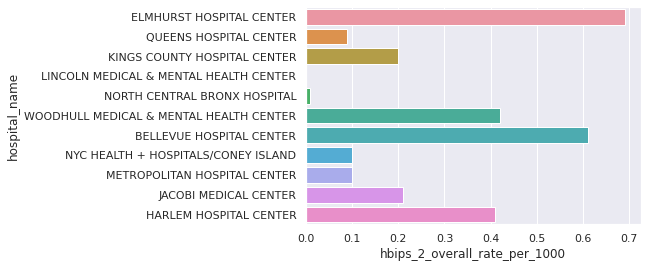

In [ ]:
sns.barplot(x = 'hbips_2_overall_rate_per_1000', y = 'hospital_name', data = Facility_df)

2)  HBIPS-3
Hours of Physical Restraints 

**Lower rates for the the HBIPS-3 measure indicates better performance.**

Elmhurst, Harlem, Metropolitan & Coney Island overall rate per 1000 hours equal to zero which indicates optimal performance. 

In [ ]:
Facility_df.groupby('hospital_name')['hbips_3_overall_rate_per_1000'].describe()

,count,unique,top,freq
hospital_name,,,,
BELLEVUE HOSPITAL CENTER,1,1,0.57,1
ELMHURST HOSPITAL CENTER,1,1,0.00,1
HARLEM HOSPITAL CENTER,1,1,0.00,1
JACOBI MEDICAL CENTER,1,1,0.17,1
KINGS COUNTY HOSPITAL CENTER,1,1,Not Available,1
LINCOLN MEDICAL & MENTAL HEALTH CENTER,1,1,0.27,1
METROPOLITAN HOSPITAL CENTER,1,1,0.00,1
NORTH CENTRAL BRONX HOSPITAL,1,1,0.21,1
NYC HEALTH + HOSPITALS/CONEY ISLAND,1,1,0.00,1


In [ ]:
#@title
Facility_df['hbips_3_overall_rate_per_1000'] = pd.to_numeric(Facility_df['hbips_3_overall_rate_per_1000'], errors='coerce')

In [ ]:
alt.Chart(Facility_df).mark_point(color='firebrick').encode(
    x='hbips_3_overall_rate_per_1000',
    y='hospital_name',
).interactive()

alt.Chart(...)

3)  HBIPS-5
Patients Discharged on Multiple Antipsychotic
Medications with Approriate Justification

**Higher rate for HBIPS-5 measure indicate better performance.**

Bellevue has the best performance in this measure across the organization.

In [ ]:
Facility_df.groupby('hospital_name')['hbips_5_percent'].describe()

,count,unique,top,freq
hospital_name,,,,
BELLEVUE HOSPITAL CENTER,1,1,96.00,1
ELMHURST HOSPITAL CENTER,1,1,71.00,1
HARLEM HOSPITAL CENTER,1,1,69.00,1
JACOBI MEDICAL CENTER,1,1,91.00,1
KINGS COUNTY HOSPITAL CENTER,1,1,87.00,1
LINCOLN MEDICAL & MENTAL HEALTH CENTER,1,1,76.00,1
METROPOLITAN HOSPITAL CENTER,1,1,85.00,1
NORTH CENTRAL BRONX HOSPITAL,1,1,67.00,1
NYC HEALTH + HOSPITALS/CONEY ISLAND,1,1,81.00,1


In [ ]:
alt.Chart(Facility_df).mark_bar(color='navy').encode(
    x='hbips_5_percent:Q',
    y=alt.Y('hospital_name:N', sort='-x')
)

alt.Chart(...)

4) FUH 30-Day

Follow-Up After Hospitalization for Mental Illness

**Higher percentages for the FUH measure indicate better performance.**

Coney Island's 59.8% for this measure inidcates the leading facility. 


In [ ]:
Facility_df.groupby('hospital_name')['fuh_30_'].describe()

,count,unique,top,freq
hospital_name,,,,
BELLEVUE HOSPITAL CENTER,1,1,35.1,1
ELMHURST HOSPITAL CENTER,1,1,52.3,1
HARLEM HOSPITAL CENTER,1,1,40.5,1
JACOBI MEDICAL CENTER,1,1,56,1
KINGS COUNTY HOSPITAL CENTER,1,1,51.2,1
LINCOLN MEDICAL & MENTAL HEALTH CENTER,1,1,36.1,1
METROPOLITAN HOSPITAL CENTER,1,1,42.7,1
NORTH CENTRAL BRONX HOSPITAL,1,1,52.6,1
NYC HEALTH + HOSPITALS/CONEY ISLAND,1,1,59.8,1


In [ ]:
alt.Chart(Facility_df).mark_point(color='purple').encode(
    x='fuh_30_',
    y='hospital_name',
)

alt.Chart(...)

5)  FUH 7-Day

Follow-Up After Hospitalization for Mental Illness

**Higher percentages for the FUH measure indicate better performance.**

In comparison to the other facilities Elmhurst's 41.8% indicates better performance.


In [ ]:
Facility_df.groupby('hospital_name')['fuh_7_'].describe()

,count,unique,top,freq
hospital_name,,,,
BELLEVUE HOSPITAL CENTER,1,1,21.6,1
ELMHURST HOSPITAL CENTER,1,1,41.8,1
HARLEM HOSPITAL CENTER,1,1,20.3,1
JACOBI MEDICAL CENTER,1,1,37.4,1
KINGS COUNTY HOSPITAL CENTER,1,1,36.6,1
LINCOLN MEDICAL & MENTAL HEALTH CENTER,1,1,13.9,1
METROPOLITAN HOSPITAL CENTER,1,1,26,1
NORTH CENTRAL BRONX HOSPITAL,1,1,26.3,1
NYC HEALTH + HOSPITALS/CONEY ISLAND,1,1,30.9,1


In [ ]:
alt.Chart(Facility_df).mark_point(color='green').encode(
    x='fuh_7_',
    y='hospital_name',
)

alt.Chart(...)

6) Readmission 30 IPF 

30-Day All-Cause Unplanned Readmission Following Paychiatric Hospitalization in a IPF

**Lower percentages for Readmission measure Day measure indicates better performance.**

Coney Island's 18.4% has the lowest readmissions.

In [ ]:
Facility_df.groupby('hospital_name')['readm_30_ipf_rate'].describe()

,count,unique,top,freq
hospital_name,,,,
BELLEVUE HOSPITAL CENTER,1,1,25.7,1
ELMHURST HOSPITAL CENTER,1,1,24.4,1
HARLEM HOSPITAL CENTER,1,1,20.5,1
JACOBI MEDICAL CENTER,1,1,20.7,1
KINGS COUNTY HOSPITAL CENTER,1,1,20.2,1
LINCOLN MEDICAL & MENTAL HEALTH CENTER,1,1,25.8,1
METROPOLITAN HOSPITAL CENTER,1,1,22.8,1
NORTH CENTRAL BRONX HOSPITAL,1,1,23.6,1
NYC HEALTH + HOSPITALS/CONEY ISLAND,1,1,18.4,1


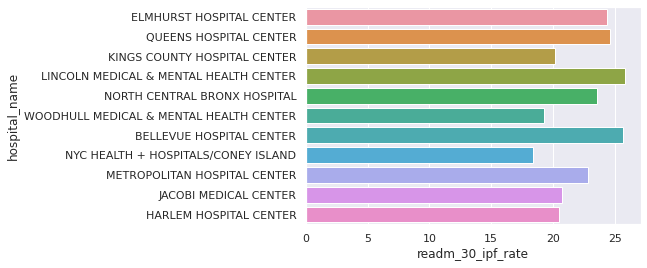

In [ ]:
sns.barplot(x = 'readm_30_ipf_rate', y = 'hospital_name', data = Facility_df)